In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 전처리(테이블 만들기)
# 2011.1~2019.12 (코로나 이전 9년 데이터)
# 2019년 기준 관광객 top5개국 중국, 일본, 미국, 대만, 홍콩의 관광 목적 입국자 수 데이터
df2 = pd.read_excel('목적별 국적별 입국_210125102021.xls')
japan = df2[df2['국적']=='일  본'].head(1)
japan = japan.drop(japan.iloc[:,japan.columns.str.contains('2020년')==True],axis=1)
japan = japan.drop(['목적','국적'],axis=1)
japan = japan.transpose()
japan.columns = ['japan']
japan = japan.japan.astype('float')
pd.DataFrame(japan)

,japan
2011년01월,189601.0
2011년02월,213970.0
2011년03월,262003.0
2011년04월,213645.0
2011년05월,229017.0
...,...
2019년09월,242475.0
2019년10월,241484.0
2019년11월,251663.0
2019년12월,248793.0


In [3]:
# 중국은 코로나 이전이 아닌 한한령이 발생한 2016년 이전 2015년까지 데이터 활용
china = df2[df2['국적']=='중  국'].head(1)

china = china.drop(china.iloc[:,china.columns.str.contains('2020년')==True],axis=1)
china = china.drop(china.iloc[:,china.columns.str.contains('2019년')==True],axis=1)
china = china.drop(china.iloc[:,china.columns.str.contains('2018년')==True],axis=1)
china = china.drop(china.iloc[:,china.columns.str.contains('2017년')==True],axis=1)
china = china.drop(china.iloc[:,china.columns.str.contains('2016년')==True],axis=1)

china = china.drop(['목적','국적'],axis=1)
china = china.transpose()
china.columns = ['china']
china = china.china.astype('float')
pd.DataFrame(china)

,china
2011년01월,55070.0
2011년02월,53863.0
2011년03월,72003.0
2011년04월,86397.0
2011년05월,85668.0
...,...
2015년09월,453670.0
2015년10월,518651.0
2015년11월,409635.0
2015년12월,381722.0


In [4]:
usa = df2[df2['국적']=='미  국'].head(1)
usa = usa.drop(usa.iloc[:,usa.columns.str.contains('2020년')==True],axis=1)
usa = usa.drop(['목적','국적'],axis=1)
usa = usa.transpose()
usa.columns = ['usa']
usa = usa.usa.astype('float')
pd.DataFrame(usa)

,usa
2011년01월,27866.0
2011년02월,26837.0
2011년03월,40121.0
2011년04월,45489.0
2011년05월,47110.0
...,...
2019년09월,70634.0
2019년10월,82230.0
2019년11월,65116.0
2019년12월,58743.0


In [5]:
taiwan = df2[df2['국적']=='대  만'].head(1)
taiwan = taiwan.drop(taiwan.iloc[:,taiwan.columns.str.contains('2020년')==True],axis=1)
taiwan = taiwan.drop(['목적','국적'],axis=1)
taiwan = taiwan.transpose()
taiwan.columns = ['taiwan']
taiwan = taiwan.taiwan.astype('float')
pd.DataFrame(taiwan)

,taiwan
2011년01월,24653.0
2011년02월,23463.0
2011년03월,24907.0
2011년04월,31169.0
2011년05월,27611.0
...,...
2019년09월,100888.0
2019년10월,126421.0
2019년11월,100595.0
2019년12월,88881.0


In [6]:
hk = df2[df2['국적']=='홍  콩'].head(1)
hk = hk.drop(hk.iloc[:,hk.columns.str.contains('2020년')==True],axis=1)
hk = hk.drop(['목적','국적'],axis=1)
hk = hk.transpose()
hk.columns = ['hk']
hk = hk.hk.astype('float')
pd.DataFrame(hk)

,hk
2011년01월,14083.0
2011년02월,21075.0
2011년03월,17752.0
2011년04월,25070.0
2011년05월,18603.0
...,...
2019년09월,44708.0
2019년10월,64439.0
2019년11월,57442.0
2019년12월,70638.0


In [7]:
time_srz =  pd.concat([usa,china,japan,hk,taiwan],axis=1)
time_srz = time_srz.iloc[:-1]
time_srz['index'] = time_srz.index
time_srz = time_srz.reset_index()
time_srz = time_srz.drop('level_0',axis=1)

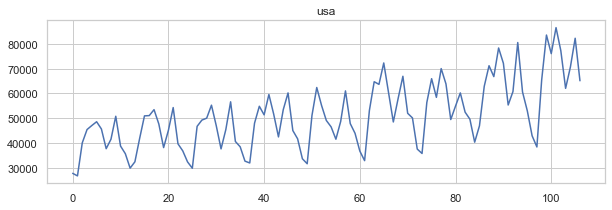

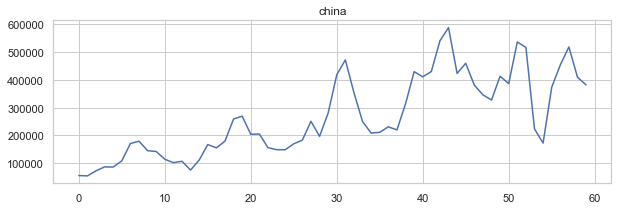

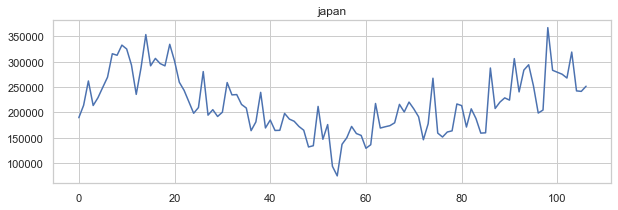

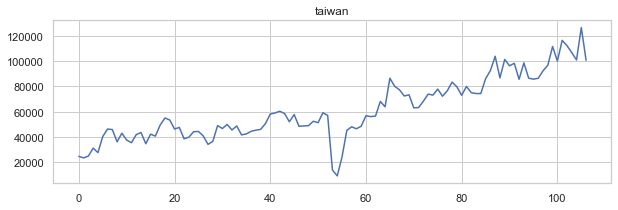

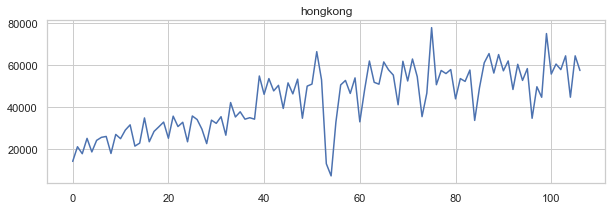

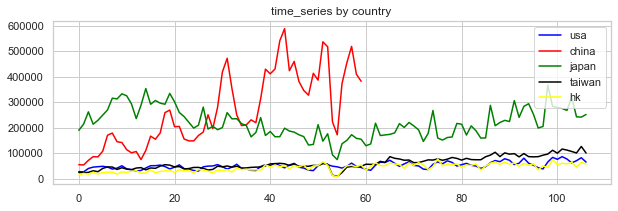

In [8]:
#대략적인 추세 확인하기(그래프)
fig, ax = plt.subplots(1, figsize=(10, 3))
time_srz.usa.iloc[:-1].plot(title='usa')

fig, ax = plt.subplots(1, figsize=(10, 3))
time_srz.china.iloc[:-1].plot(title='china')

fig, ax = plt.subplots(1, figsize=(10, 3))
time_srz.japan.iloc[:-1].plot(title='japan')

fig, ax = plt.subplots(1, figsize=(10, 3))
time_srz.taiwan.iloc[:-1].plot(title='taiwan')

fig, ax = plt.subplots(1, figsize=(10, 3))
time_srz.hk.iloc[:-1].plot(title='hongkong')

fig, ax = plt.subplots(1, figsize=(10, 3))
time_srz.usa.iloc[:-1].plot(title='usa',color='blue')
time_srz.china.iloc[:-1].plot(title='china',color='red')
time_srz.japan.iloc[:-1].plot(title='japan',color='green')
time_srz.taiwan.iloc[:-1].plot(title='taiwan',color='black')
time_srz.hk.iloc[:-1].plot(title='hongkong',color='yellow')
plt.title("time_series by country ")
plt.legend()

plt.show()

<Figure size 432x288 with 0 Axes>

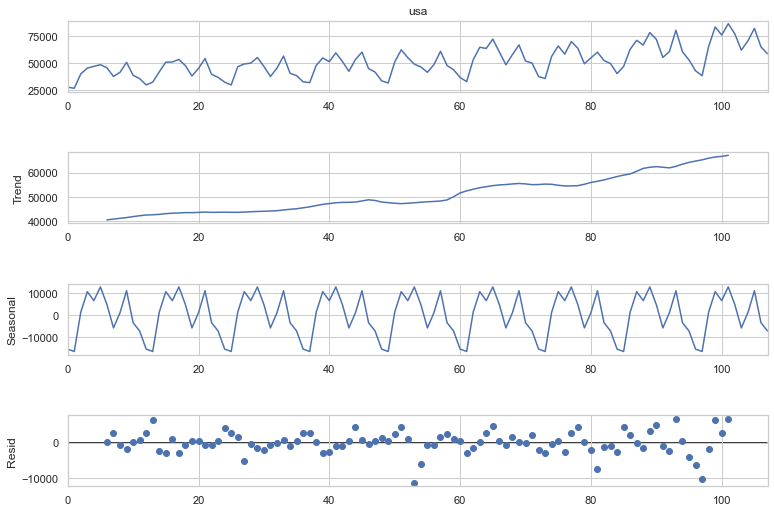

In [9]:
# 미국 입국자 수 데이터 seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_usa = seasonal_decompose(time_srz.usa, model='additive', freq=12)
fig = plt.figure()
fig = decomposition_usa.plot()
fig.set_size_inches(12, 8)

<Figure size 432x288 with 0 Axes>

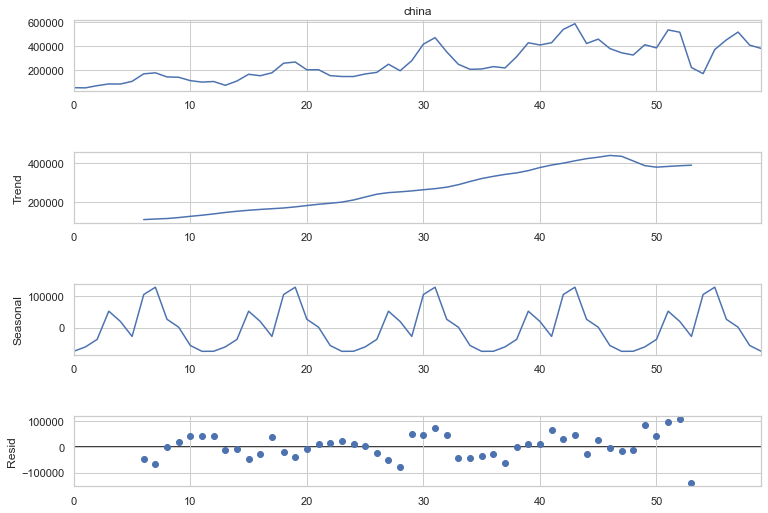

In [10]:
# 중국 입국자 수 데이터 seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_china = seasonal_decompose(time_srz.china[:60], model='additive', freq=12)
fig = plt.figure()
fig = decomposition_china.plot()
fig.set_size_inches(12, 8)

<Figure size 432x288 with 0 Axes>

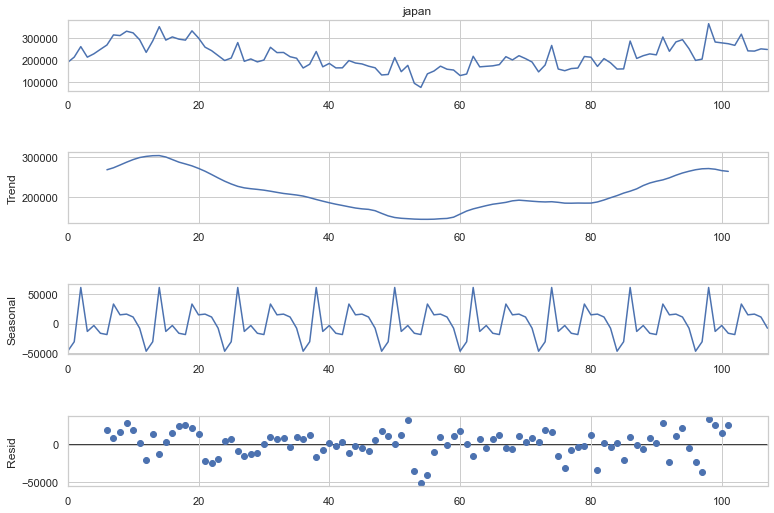

In [11]:
# 일본 입국자 수 데이터 seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_japan = seasonal_decompose(time_srz.japan, model='additive', freq=12)
fig = plt.figure()
fig = decomposition_japan.plot()
fig.set_size_inches(12, 8)

<Figure size 432x288 with 0 Axes>

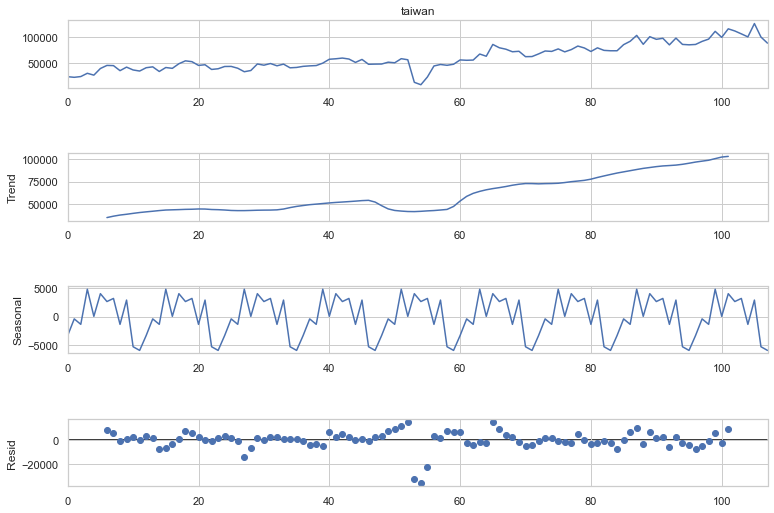

In [12]:
# 대만 입국자 수 데이터 seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_taiwan = seasonal_decompose(time_srz.taiwan, model='additive', freq=12)
fig = plt.figure()
fig = decomposition_taiwan.plot()
fig.set_size_inches(12, 8)

<Figure size 432x288 with 0 Axes>

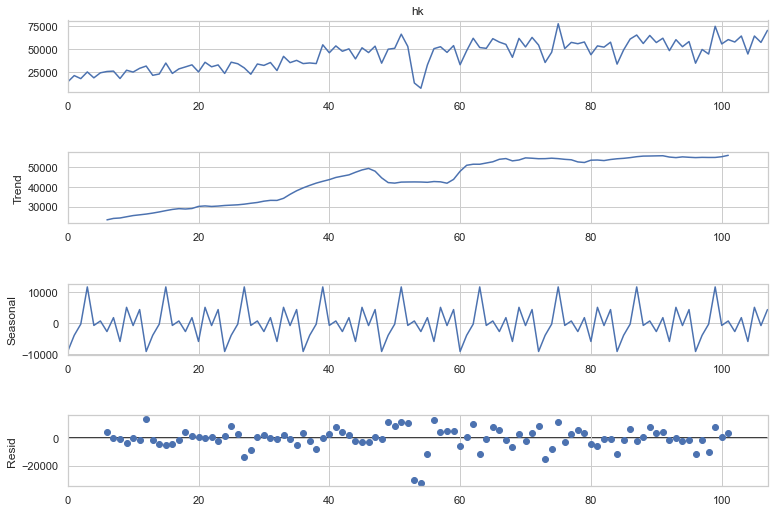

In [13]:
# 홍콩 입국자 수 데이터 seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_hk = seasonal_decompose(time_srz.hk, model='additive', freq=12)
fig = plt.figure()
fig = decomposition_hk.plot()
fig.set_size_inches(12, 8)

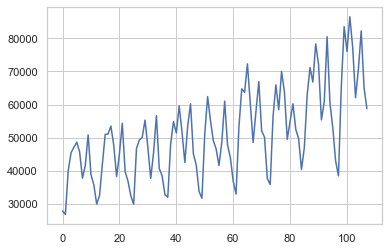

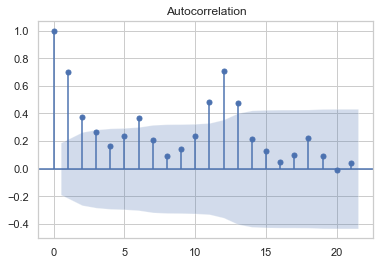

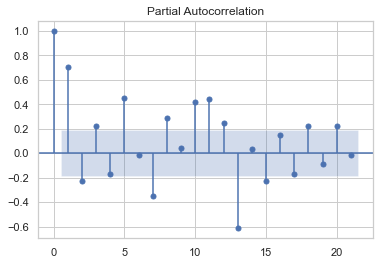

In [14]:
#미국 data로 acf, pacf 그리기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
time_srz.usa.plot()
plot_acf(time_srz.usa)
plot_pacf(time_srz.usa)
plt.show()

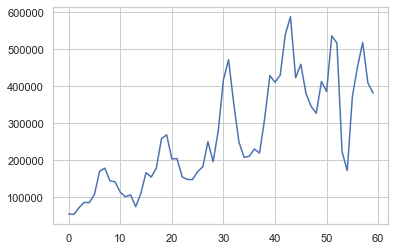

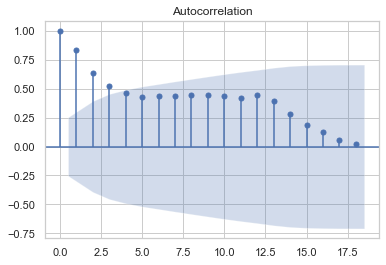

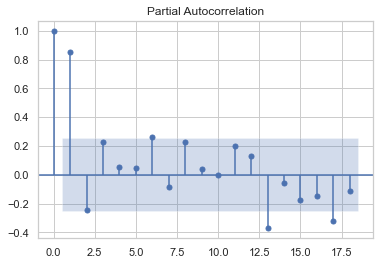

In [15]:
#중국 data로 acf, pacf 그리기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
time_srz.china[:60].plot()
plot_acf(time_srz.china[:60])
plot_pacf(time_srz.china[:60])
plt.show()

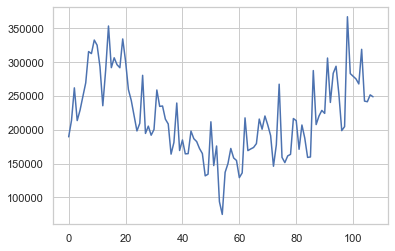

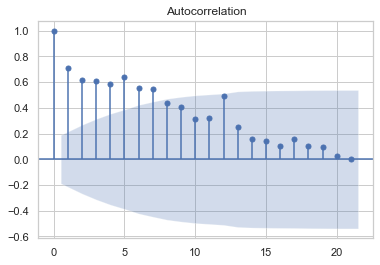

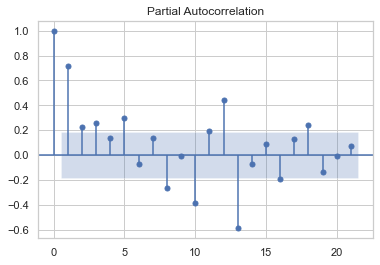

In [16]:
#일본 data로 acf, pacf 그리기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
time_srz.japan.plot()
plot_acf(time_srz.japan)
plot_pacf(time_srz.japan)
plt.show()

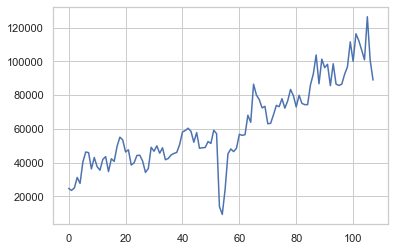

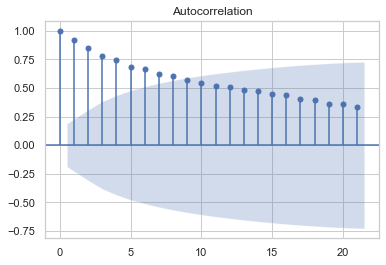

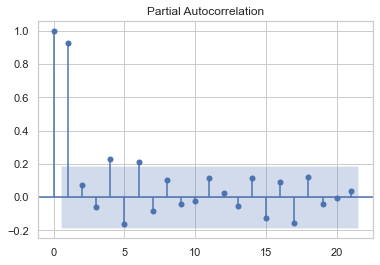

In [17]:
#대만 data로 acf, pacf 그리기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
time_srz.taiwan.plot()
plot_acf(time_srz.taiwan)
plot_pacf(time_srz.taiwan)
plt.show()

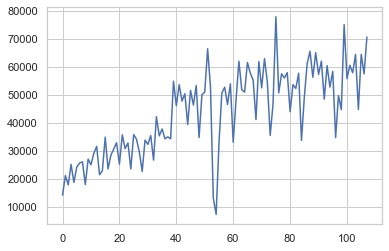

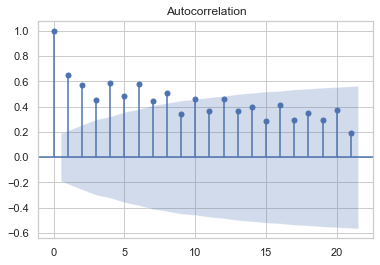

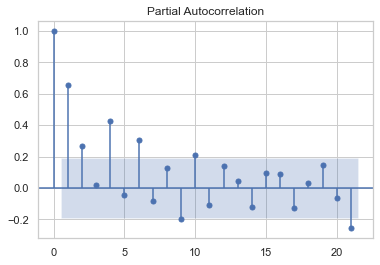

In [18]:
#홍콩 data로 acf, pacf 그리기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
time_srz.hk.plot()
plot_acf(time_srz.hk)
plot_pacf(time_srz.hk)
plt.show()

In [19]:
#모델의 정상성 확인 함수 설정
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

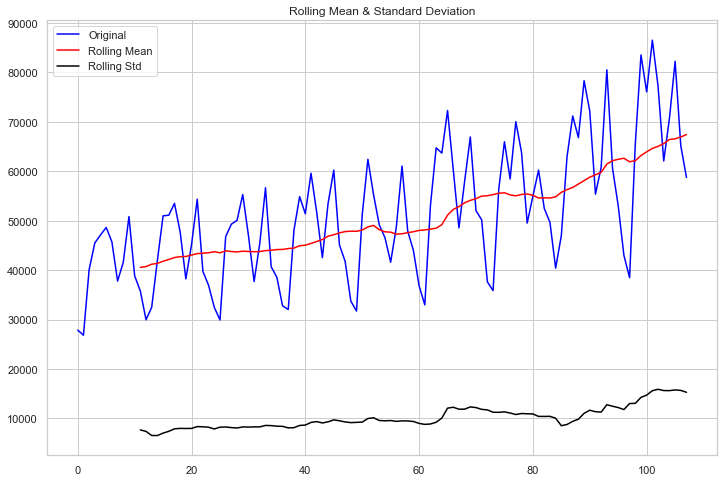

Results of Dickey-Fuller Test:
Test Statistic                  1.034483
p-value                         0.994617
#Lags Used                     12.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


In [20]:
# 미국 data 정상성 확인
test_stationarity(time_srz.usa)
#원데이터 그대로 정상성을 확인하였더니 비정상으로 확인된다(pvalue=0.99)

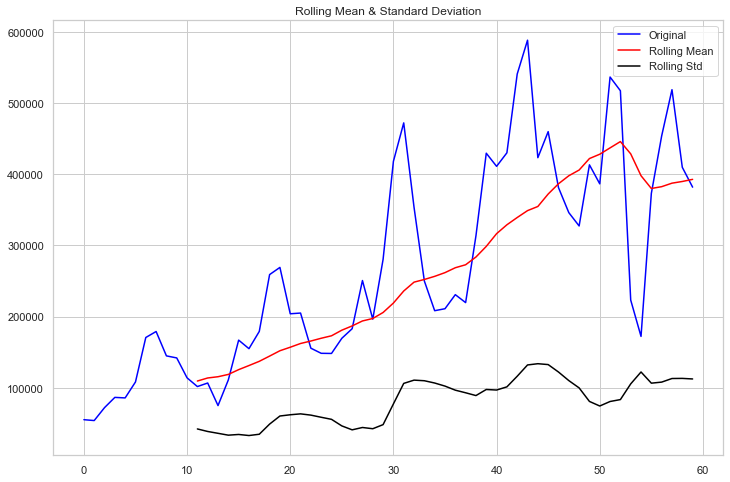

Results of Dickey-Fuller Test:
Test Statistic                 -0.780110
p-value                         0.824895
#Lags Used                     10.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


In [21]:
# 중국 data 정상성 확인
test_stationarity(time_srz.china[:60])
#원데이터 그대로 정상성을 확인하였더니 비정상으로 확인된다(pvalue=0.82)

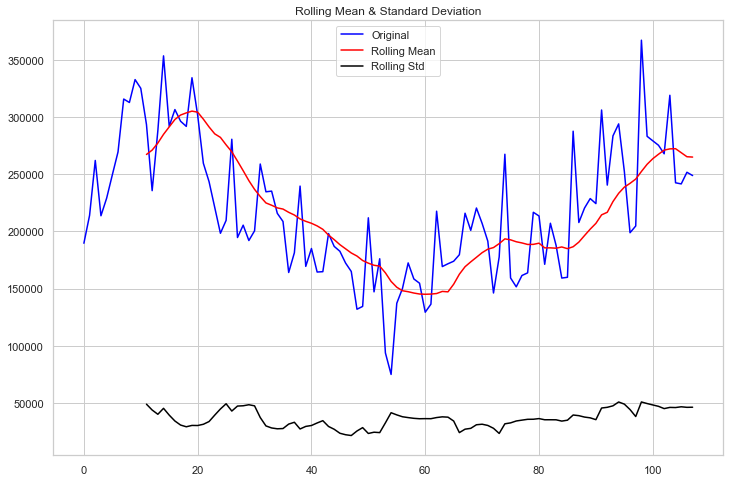

Results of Dickey-Fuller Test:
Test Statistic                 -2.493196
p-value                         0.117139
#Lags Used                     12.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


In [22]:
# 일본 data 정상성 확인
test_stationarity(time_srz.japan)
#원데이터 그대로 정상성을 확인하였더니 비정상으로 확인된다(pvalue=0.11)

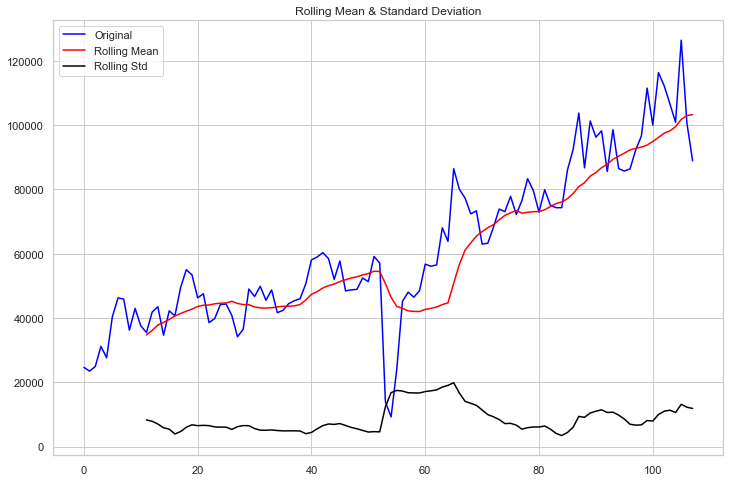

Results of Dickey-Fuller Test:
Test Statistic                  -0.715402
p-value                          0.842720
#Lags Used                       5.000000
Number of Observations Used    102.000000
Critical Value (1%)             -3.496149
Critical Value (5%)             -2.890321
Critical Value (10%)            -2.582122
dtype: float64


In [23]:
# 대만 data 정상성 확인
test_stationarity(time_srz.taiwan)
#원데이터 그대로 정상성을 확인하였더니 비정상으로 확인된다(pvalue=0.84)

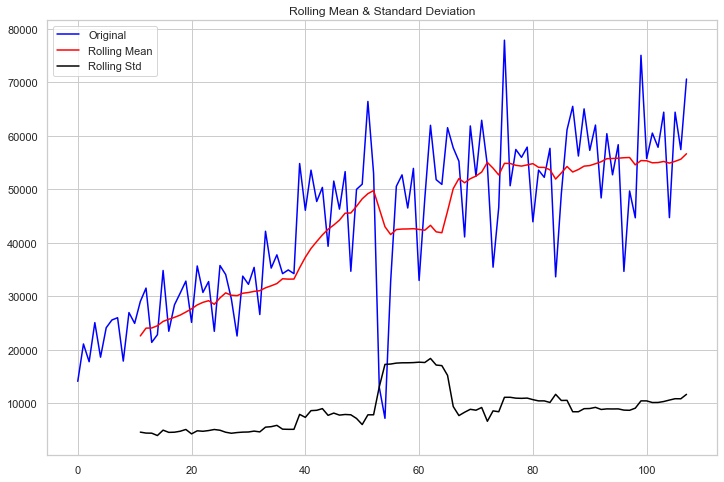

Results of Dickey-Fuller Test:
Test Statistic                 -1.356676
p-value                         0.602861
#Lags Used                     11.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


In [24]:
# 홍콩 data 정상성 확인
test_stationarity(time_srz.hk)
#원데이터 그대로 정상성을 확인하였더니 비정상으로 확인된다(pvalue=0.60)

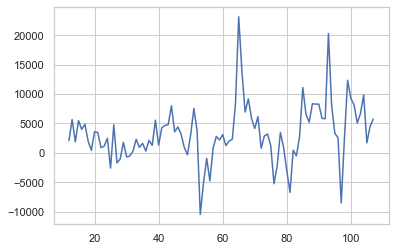

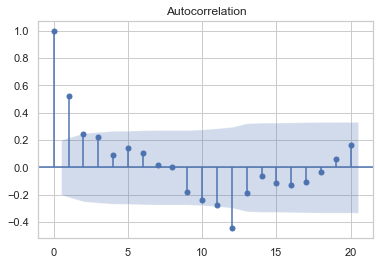

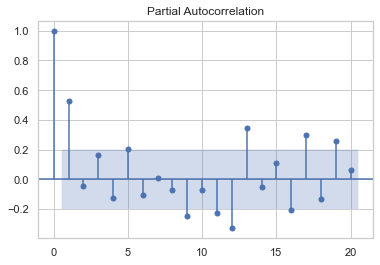

In [25]:
#계절 차분한 미국 data로 acf, pacf 그리기

usa_diff_12 = time_srz.usa.diff(periods=12)
usa_diff_12.plot()
plot_acf(usa_diff_12.iloc[13:])
plot_pacf(usa_diff_12.iloc[13:])
plt.show()

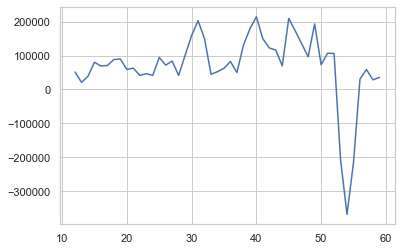

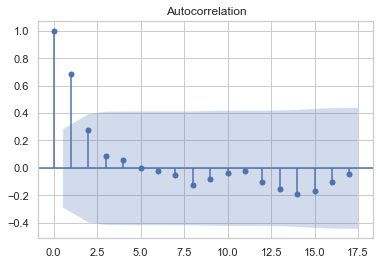

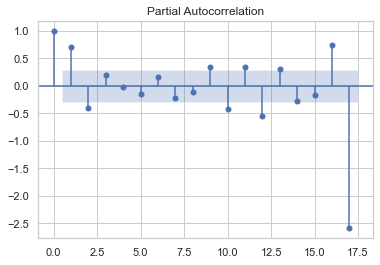

In [26]:
#계절 차분한 중국 data로 acf, pacf 그리기

china_diff_12 = time_srz.china[:60].diff(periods=12)
china_diff_12.plot()
plot_acf(china_diff_12.iloc[13:])
plot_pacf(china_diff_12.iloc[13:])
plt.show()

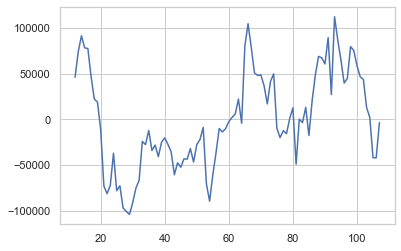

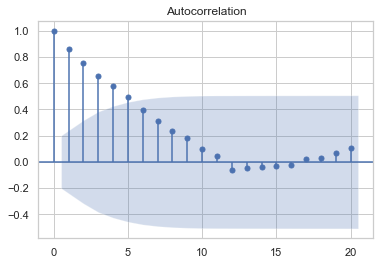

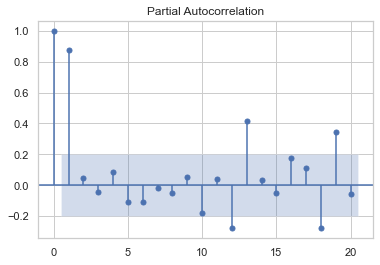

In [27]:
#계절 차분한 일본 data로 acf, pacf 그리기

japan_diff_12 = time_srz.japan.diff(periods=12)
japan_diff_12.plot()
plot_acf(japan_diff_12.iloc[13:])
plot_pacf(japan_diff_12.iloc[13:])
plt.show()

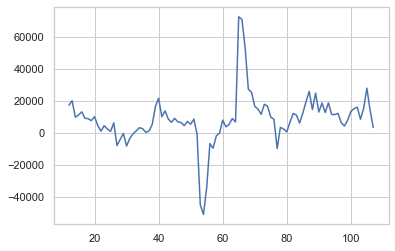

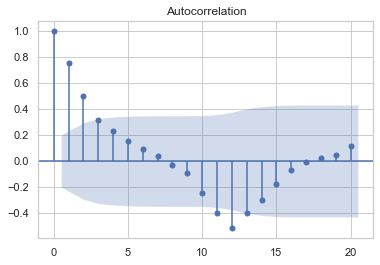

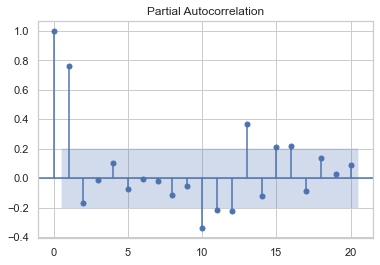

In [28]:
#계절 차분한 대만 data로 acf, pacf 그리기

taiwan_diff_12 = time_srz.taiwan.diff(periods=12)
taiwan_diff_12.plot()
plot_acf(taiwan_diff_12.iloc[13:])
plot_pacf(taiwan_diff_12.iloc[13:])
plt.show()

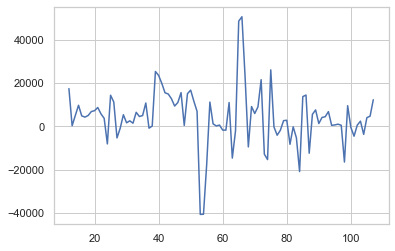

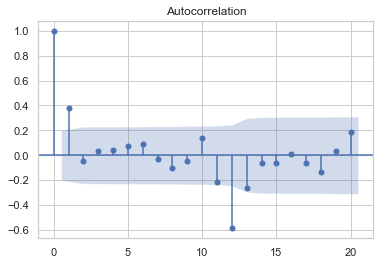

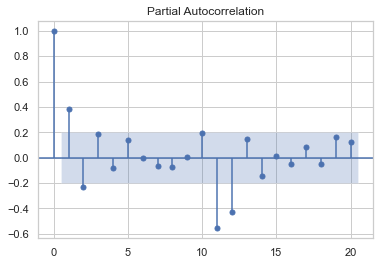

In [29]:
#계절 차분한 홍콩 data로 acf, pacf 그리기

hk_diff_12 = time_srz.hk.diff(periods=12)
hk_diff_12.plot()
plot_acf(hk_diff_12.iloc[13:])
plot_pacf(hk_diff_12.iloc[13:])
plt.show()

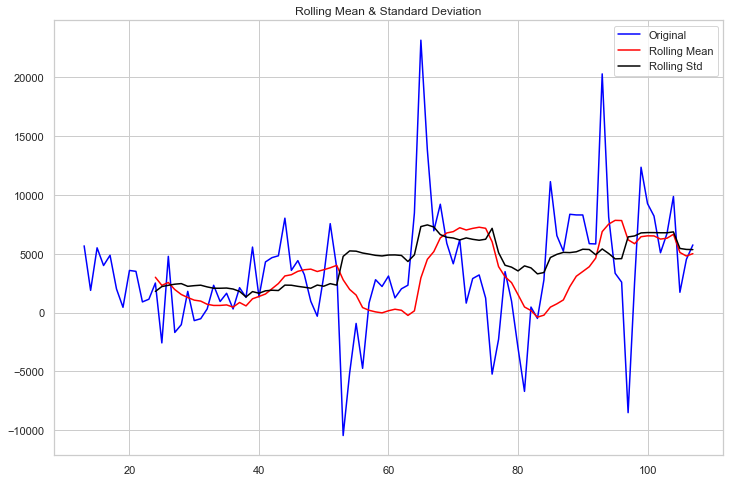

Results of Dickey-Fuller Test:
Test Statistic                 -2.791419
p-value                         0.059510
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [30]:
test_stationarity(usa_diff_12.iloc[13:])
# 계절 차분한 미국 data 정상성 확인 결과 정상으로 확인된다(pvalue=0.05)

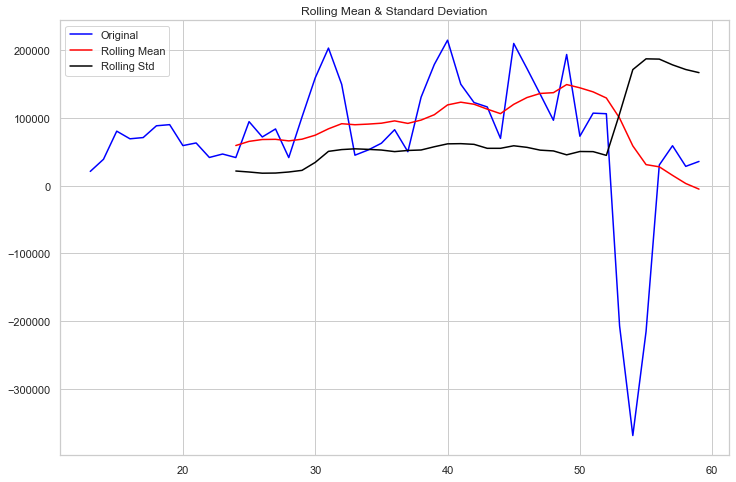

Results of Dickey-Fuller Test:
Test Statistic                 -3.760913
p-value                         0.003334
#Lags Used                      1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64


In [31]:
test_stationarity(china_diff_12.iloc[13:])
# 계절 차분한 중국 data 정상성 확인 결과 정상으로 확인된다(pvalue=0.003)

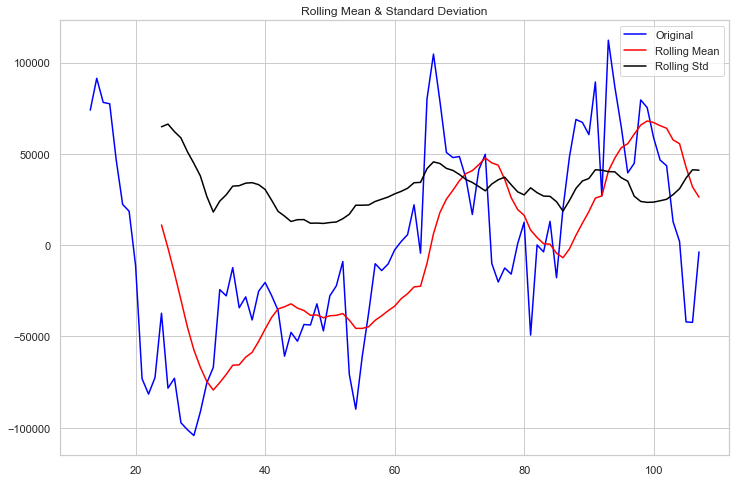

Results of Dickey-Fuller Test:
Test Statistic                 -1.931447
p-value                         0.317415
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [32]:
test_stationarity(japan_diff_12.iloc[13:])
# 계절 차분한 일본 data 정상성 확인 결과 정상으로 확인된다(pvalue=0.31)

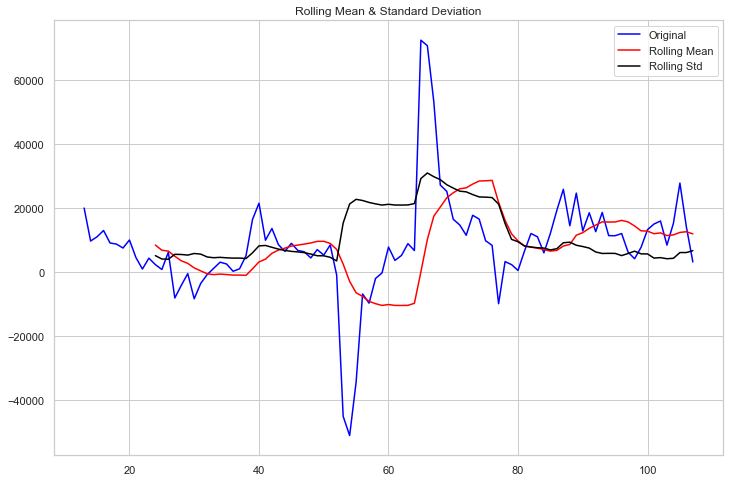

Results of Dickey-Fuller Test:
Test Statistic                 -2.662317
p-value                         0.080789
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [33]:
test_stationarity(taiwan_diff_12.iloc[13:])
# 계절 차분한 대만 data 정상성 확인 결과 정상으로 확인된다(pvalue=0.08)

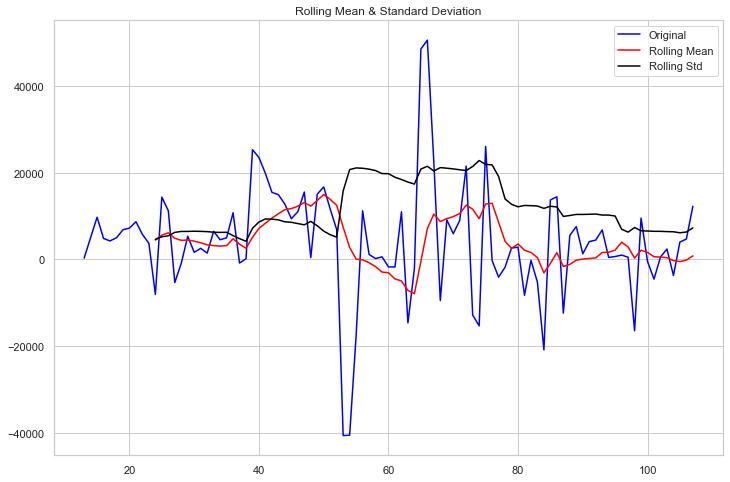

Results of Dickey-Fuller Test:
Test Statistic                 -4.933451
p-value                         0.000030
#Lags Used                     11.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [34]:
test_stationarity(hk_diff_12.iloc[13:])
# 계절 차분한 홍콩 data 정상성 확인 결과 정상으로 확인된다(pvalue=0.00)

In [35]:
!pip install statespace
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [36]:
# 미국 데이터에 SARIMAX 모형에 fit 하여 계수 유의성 살펴보기
sarimax = SARIMAX(time_srz.usa, order=(2,0,2), seasonal_order=(1,1,1,12))
result_usa = sarimax.fit()
print(result_usa.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                  usa   No. Observations:                  108
Model:             SARIMAX(2, 0, 2)x(1, 1, [1], 12)   Log Likelihood                -937.612
Date:                              Sun, 31 Jan 2021   AIC                           1889.225
Time:                                      20:00:12   BIC                           1907.175
Sample:                                           0   HQIC                          1896.480
                                              - 108                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2275      0.228      5.378      0.000       0.780       1.675
ar.L2         -0.22

In [37]:
# 중국 데이터를 SARIMAX 모형에 fit 하여 계수 유의성 살펴보기
sarimax = SARIMAX(time_srz.china[:60], order=(5,0,2), seasonal_order=(0,1,1,12))
result_china = sarimax.fit()
print(result_china.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                china   No. Observations:                   60
Model:             SARIMAX(5, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -600.073
Date:                              Sun, 31 Jan 2021   AIC                           1218.145
Time:                                      20:00:12   BIC                           1234.986
Sample:                                           0   HQIC                          1224.509
                                               - 60                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2097      0.262     -0.801      0.423      -0.722       0.303
ar.L2          0.14

In [38]:
# 대만 데이터를 SARIMAX 모형에 fit 하여 계수 유의성 살펴보기
sarimax = SARIMAX(time_srz.taiwan, order=(3,0,2), seasonal_order=(1,1,1,12))
result_taiwan = sarimax.fit()
print(result_taiwan.summary())

                                      SARIMAX Results                                       
Dep. Variable:                               taiwan   No. Observations:                  108
Model:             SARIMAX(3, 0, 2)x(1, 1, [1], 12)   Log Likelihood               -1010.912
Date:                              Sun, 31 Jan 2021   AIC                           2037.824
Time:                                      20:00:13   BIC                           2058.339
Sample:                                           0   HQIC                          2046.116
                                              - 108                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7551      4.062      0.432      0.666      -6.206       9.716
ar.L2         -0.80

In [39]:
# 홍콩 데이터를 SARIMAX 모형에 fit 하여 계수 유의성 살펴보기
sarimax = SARIMAX(time_srz.hk, order=(2,0,2), seasonal_order=(1,1,1,12))
result_hk = sarimax.fit()
print(result_hk.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                   hk   No. Observations:                  108
Model:             SARIMAX(2, 0, 2)x(1, 1, [1], 12)   Log Likelihood               -1017.285
Date:                              Sun, 31 Jan 2021   AIC                           2048.571
Time:                                      20:00:14   BIC                           2066.521
Sample:                                           0   HQIC                          2055.826
                                              - 108                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9866      0.497      1.985      0.047       0.012       1.961
ar.L2          0.00

In [40]:
# train, test set 분할(반반으로 쪼갬)
time_train = time_srz.iloc[range(54)]
time_test = time_srz.iloc[range(53,108)]

Text(0.5, 1.0, 'predict vs real data')

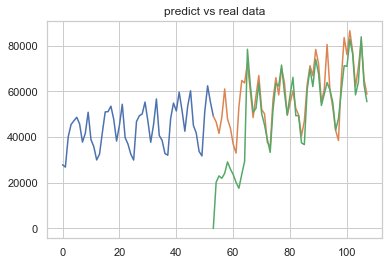

In [71]:
# 미국 training data로 test기간 prediction
model_test = SARIMAX(time_test.usa, order=(1,0,1), seasonal_order=(1,1,1,12))
result_usa_test = model_test.fit()
pre_test = result_usa_test.predict()
pre_test
plt.plot(time_train.usa)
plt.plot(time_test.usa)
plt.plot(pre_test)
plt.title("predict vs real data")

Text(0.5, 1.0, 'predict vs real data')

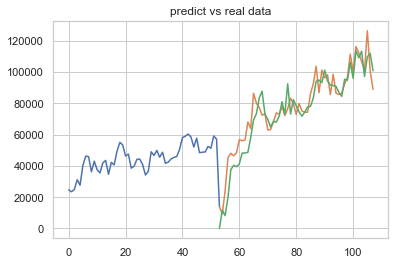

In [80]:
# 대만 training data로 test기간 prediction
model_test = SARIMAX(time_test.taiwan, order=(3,0,2), seasonal_order=(1,1,1,12))
result_taiwan_test = model_test.fit()
pre_test = result_taiwan_test.predict()
pre_test
plt.plot(time_train.taiwan)
plt.plot(time_test.taiwan)
plt.plot(pre_test)
plt.title("predict vs real data")

Text(0.5, 1.0, 'predict vs real data')

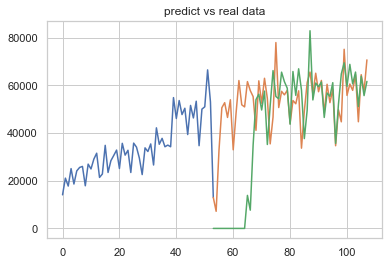

In [79]:
# 홍콩 training data로 test기간 prediction
model_test = SARIMAX(time_test.hk, order=(0,0,0), seasonal_order=(1,1,1,12))
result_hk_test = model_test.fit()
pre_test = result_hk_test.predict()
pre_test
plt.plot(time_train.hk)
plt.plot(time_test.hk)
plt.plot(pre_test)
plt.title("predict vs real data")